# Networkx Basics

---

Python's *networkx* library basics. You can find the documentation [here](https://networkx.org/documentation/stable/index.html).

For Network Science @ IST (2023/2024).

In [ ]:
import networkx as nx               # graphs manipulation
import matplotlib.pyplot as plt     # visualization
import numpy as np                  # auxiliar functions
import random as rand               # Random

Before starting, we will be using the dolphins dataset as an example.
To make this notebook functional, do as follows:
- go to the [Network data](http://www-personal.umich.edu/~mejn/netdata/) website;
- select the "*Dolphin social network*" dataset. A zip will be downloaded;
- unzip the downloaded file and import the *dolphins.gml* file to this notebook (go to archives directory on the left panel, then press upload);

You should be set to go.

##  Building graphs

There are three main ways to build graphs, as we will see below.

### Building it by hand

Specify each node and each edge, aswell as other relevant properties of the graph.

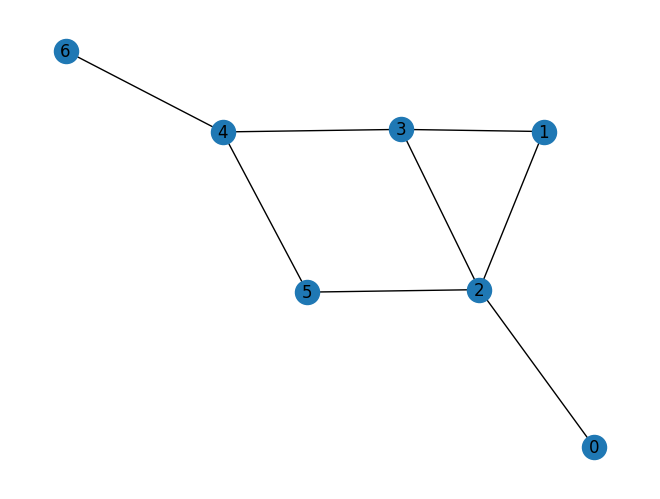

In [ ]:
"""
1. Building a graph by hand
   we will build the graph from problem set 1
"""

# define nodes and edges
nodes = [0, 1, 2, 3, 4, 5, 6]
edges = [(0, 2), (2, 1), (2, 5), (2, 3), (3, 4), (5, 4), (4, 6), (1, 3)]

# build the graph object
G1 = nx.Graph()

# add nodes and edges
G1.add_nodes_from(nodes)
G1.add_edges_from(edges)

# draw the graph
nx.draw(G1, with_labels=True)

{(1, 2): Text(0.0, 0.5, '0.5'),
 (1, 3): Text(0.5, 0.0, '0.8'),
 (2, 4): Text(0.25, 0.75, '1.2'),
 (4, 1): Text(0.25, 0.25, '0.2'),
 (4, 3): Text(0.75, 0.25, '0.9')}

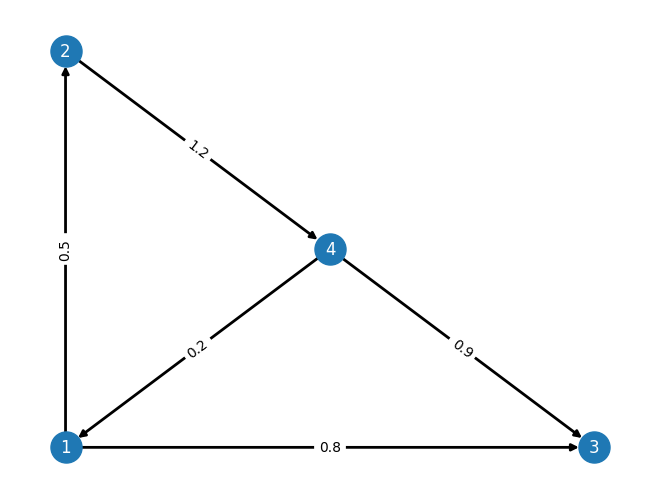

In [ ]:
"""
You can also build a weighted graph.
In this example, we will build a directed and weighted graph with nodes on
specific positions.
"""

# build graph
G = nx.DiGraph()

# add nodes, each with a defined position
G.add_node(1, pos=(0, 0))
G.add_node(2, pos=(0, 1))
G.add_node(3, pos=(1, 0))
G.add_node(4, pos=(0.5, 0.5))

# add edges with a corresponding weight
G.add_edge(1, 2, weight=0.5)
G.add_edge(1, 3, weight=0.8)
G.add_edge(2, 4, weight=1.2)
G.add_edge(4, 1, weight=0.2)
G.add_edge(4, 3, weight=0.9)

# first draw the graph itself without the weights
pos=nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, node_size=500, with_labels=True, font_color="white", width=2)

# on top of the graph add the weights
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

### Importing data from file
See all possible ways to import a graph data from a file, see this [reference](https://networkx.org/documentation/stable/reference/readwrite/index.html).

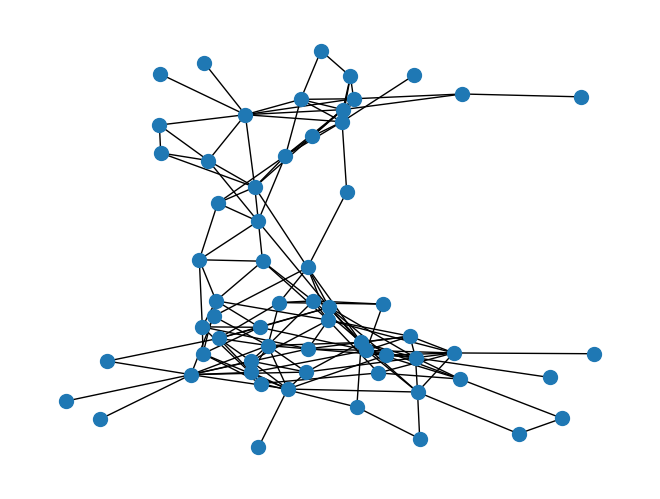

In [ ]:
"""
2. Importing data from file
   we will build the dolphins social network (http://www-personal.umich.edu/~mejn/netdata/)
"""

# directly read the *.gml file
G2 = nx.read_gml("dolphins.gml")

# draw the graph
nx.draw(G2, node_size=100)

In [ ]:
"""
From that, you can also get some of the graph properties
"""

# you can access nodes and edges
print(G2.nodes)
print(G2.edges)

# other properties can be accessed as follows
print(G2.number_of_nodes(), G2.number_of_edges(), G2.is_directed())

G3 = G2.copy()

# note that you can always modify your graph
G3.add_nodes_from([0, 1, 2, 3, 4, 5])
G2.number_of_nodes(), G3.number_of_nodes()

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']
[('Beak', 'Fish'), ('Beak', 'Grin'), ('Beak', 'Haecksel'), ('Beak', 'SN9'), ('Beak', 'SN96'), ('Beak', 'TR77'), ('Beescratch', 'Jet'), ('Beescratch', 'Knit'), ('Beescratch', 'Notch'), ('Beescratch', 'Number1'), ('Beescratch', 'Oscar'), ('Beescratch', 'SN100'), ('Beescratch', 'SN90'), ('Beescratch', 'Upbang'), ('Bumper', 'Fish'), ('Bumper', 'SN96'), ('Bumper', 'Thumper'), ('Bumper', 'Zipfel'), ('CCL', 'Double'), ('CCL', 'Grin'), ('CCL',

(62, 68)

### Generating graphs

Using implemented functions, we can build graphs, for instance, random graphs (see [this](https://networkx.org/documentation/stable/reference/generators.html)).

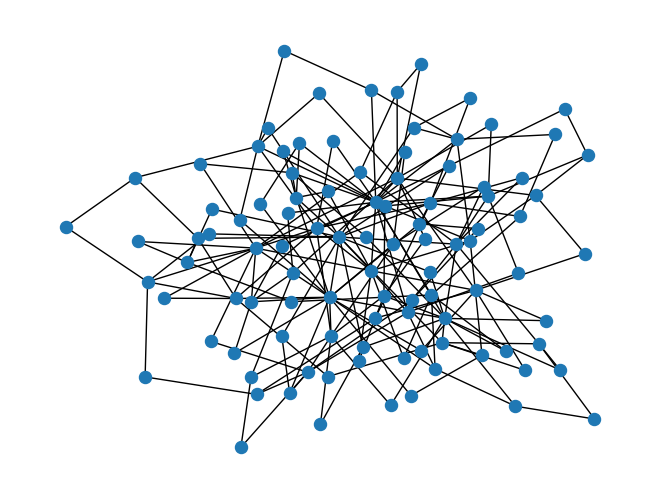

In [ ]:
"""
3. Generate a graph using a function
   we will build a random graph using Barabási–Albert preferential attachment
"""

# generate graph with the Barabási Albert algorithm
G4 = nx.barabasi_albert_graph(n=100, m=2)

# draw the graph
nx.draw(G4, node_size=75)

What if we want to generate a random graph **manually**? (not using any implemented function)


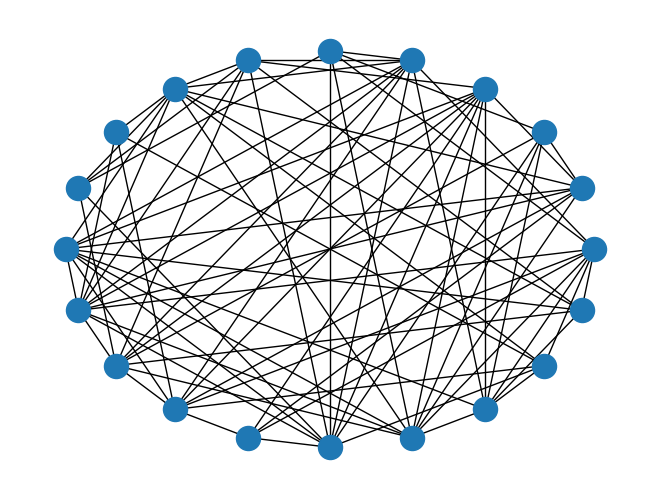

In [ ]:
"""
Let us generate the following model (Erdos-Renyi)
G(N,p) model: Each pair of N nodes is connected with probabilty p
"""

# number of desired nodes
N = 20
# probability of two nodes being connected
p = 0.2

# build graph object
G5 = nx.Graph(directed=False)

# create graph with N nodes
for n in range(N):
  G5.add_node(n)

# Model
for i in range(N):
  for j in range(N):
    if i==j:
      continue
    if rand.random() < p:
      G5.add_edge(i, j)

# draw graph in a circular layout
nx.draw(G5, pos=nx.circular_layout(G5))

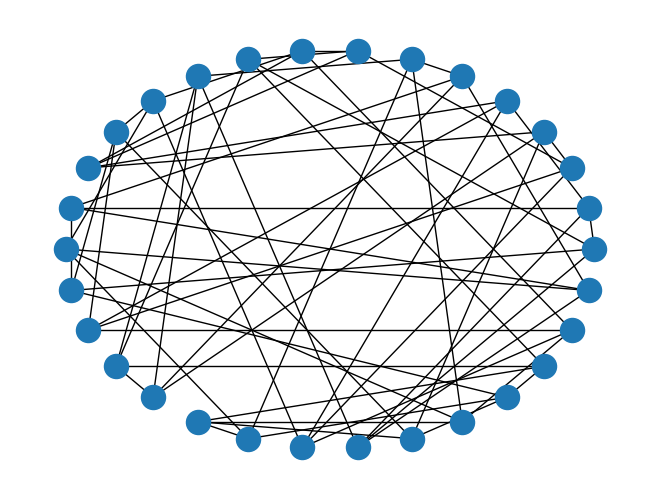

In [ ]:
"""
Now let's generate a Watts-Strogatz random graph.
We start by creating an n-regular graph
"""

# build undirected graph
G6 = nx.Graph(directed=False)

# Number of desired nodes
N = 30

# create graph with N nodes
G6 = nx.random_regular_graph(4, N)

# draw graph in a circular layout
nx.draw(G6, pos=nx.circular_layout(G6))

Now we apply the WS Model with p=1, essentially turning it into a random graph.

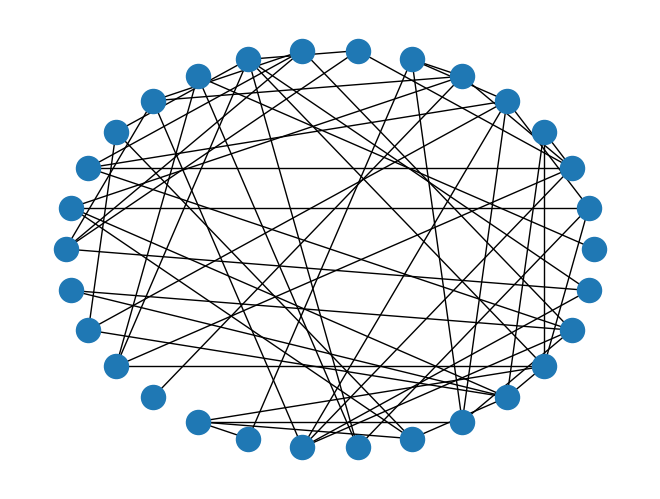

In [ ]:
# WS-p parameter (redirection)
p = 0.9

# run the WS algorithm
for n in G6:
  if rand.random() < p:
    # remove a random edge of node n
    G6.remove_edge(*rand.choice(list(G6.edges(n))))
    # rewire to another node!=n
    G6.add_edge(n, rand.choice([a for a in G6 if a!=n]))

# draw graph in a circular layout
nx.draw(G6, pos=nx.circular_layout(G6))

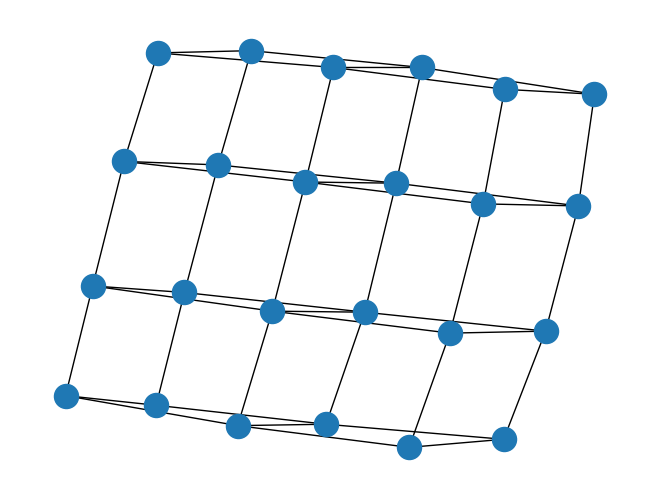

In [ ]:
"""
Another type og graph to generate is a grid graph
"""

# generate a grid graph given dimentions
G7 = nx.grid_graph(dim=(2, 3, 4))

# draw the graph
nx.draw(G7)

## Functions

Compute adjacency matrix, adjacency list, graph properties and more.

Some functions may be found in [functions](https://networkx.org/documentation/stable/reference/functions.html) while others can be found in [linear algebra](https://networkx.org/documentation/stable/reference/linalg.html).

In [ ]:
# get the degree for each node
nx.degree(G2)

DegreeView({'Beak': 6, 'Beescratch': 8, 'Bumper': 4, 'CCL': 3, 'Cross': 1, 'DN16': 4, 'DN21': 6, 'DN63': 5, 'Double': 6, 'Feather': 7, 'Fish': 5, 'Five': 1, 'Fork': 1, 'Gallatin': 8, 'Grin': 12, 'Haecksel': 7, 'Hook': 6, 'Jet': 9, 'Jonah': 7, 'Knit': 4, 'Kringel': 9, 'MN105': 6, 'MN23': 1, 'MN60': 3, 'MN83': 6, 'Mus': 3, 'Notch': 3, 'Number1': 5, 'Oscar': 5, 'Patchback': 9, 'PL': 5, 'Quasi': 1, 'Ripplefluke': 3, 'Scabs': 10, 'Shmuddel': 5, 'SMN5': 1, 'SN100': 7, 'SN4': 11, 'SN63': 8, 'SN89': 2, 'SN9': 8, 'SN90': 5, 'SN96': 6, 'Stripes': 7, 'Thumper': 4, 'Topless': 11, 'TR120': 2, 'TR77': 6, 'TR82': 1, 'TR88': 2, 'TR99': 7, 'Trigger': 10, 'TSN103': 4, 'TSN83': 2, 'Upbang': 7, 'Vau': 2, 'Wave': 2, 'Web': 9, 'Whitetip': 1, 'Zap': 5, 'Zig': 1, 'Zipfel': 3})

In [ ]:
# graph degree frequency
nx.degree_histogram(G2)

[0, 9, 6, 6, 5, 8, 8, 7, 4, 4, 2, 2, 1]

In [ ]:
# Graph density
nx.density(G2)

0.08408249603384453

In [ ]:
# number of nodes and edges
nx.number_of_nodes(G2), nx.number_of_edges(G2)

(62, 159)

In [ ]:
# compute and display the adjacency matrix
nx.adjacency_matrix(G2).todense()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [ ]:
# generate adjacency list (for graph G1)
for line in nx.generate_adjlist(G1):
  print(line)

0 2
1 2 3
2 5 3
3 4
4 5 6
5
6


We may notice that this adjacency may not be completely correct for graph G1. Networkx may have some limitations in some methods, nevertheless, we can propose a new method to compute it manually.

In [ ]:
"""
Alternative manual way to compute the adjacency list (it is not optimized)
"""

for node in G1.nodes:
  adj_l = []

  for n1, n2 in G1.edges:
    if node == n1:
      adj_l.append(n2)
    if node == n2:
      adj_l.append(n1)

  print(node, ": ", sorted(adj_l))

0 :  [2]
1 :  [2, 3]
2 :  [0, 1, 3, 5]
3 :  [1, 2, 4]
4 :  [3, 5, 6]
5 :  [2, 4]
6 :  [4]


## Algorithms

Compute graph diameter, centralities, etc. See more [here](https://networkx.org/documentation/stable/reference/algorithms/index.html).

In [ ]:
# Graph diameter
nx.diameter(G2)

8

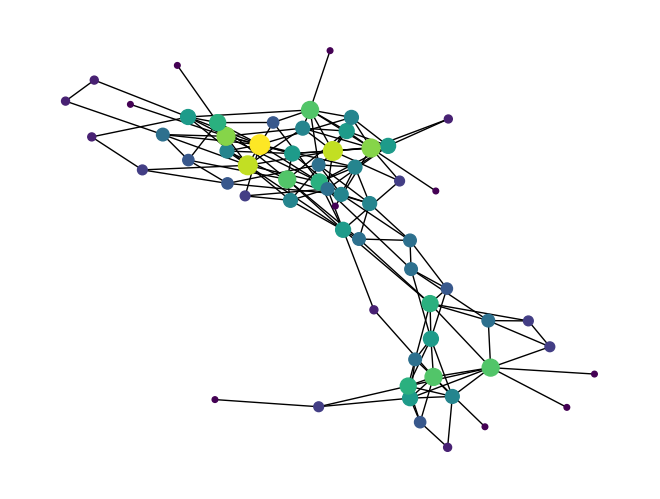

In [ ]:
# compute graph degree centrality
centrality = nx.degree_centrality(G2)
centrality = np.fromiter(centrality.values(), float)

# draw graph with node's color and size based on degree centrality
nx.draw(G2, node_color=centrality, node_size=centrality*1e3)

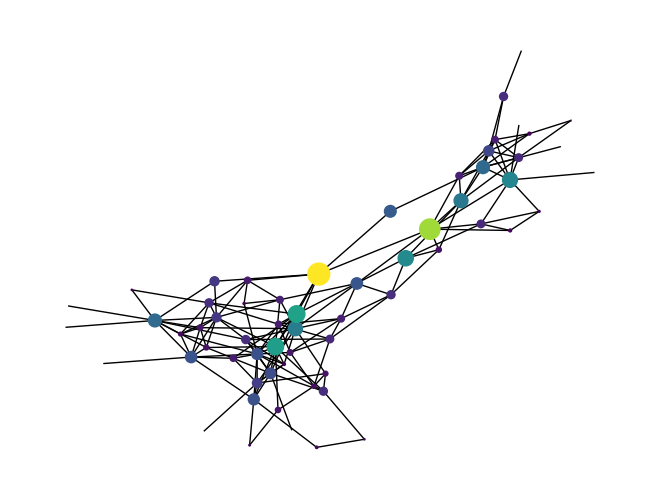

In [ ]:
# compute graph betweenness centrality
centrality = nx.betweenness_centrality(G2)
centrality = np.fromiter(centrality.values(), float)

# draw graph with node's color and size based on betweenness centrality
nx.draw(G2, node_color=centrality, node_size=centrality*1e3)

## Visualization

In this section you will find some drawing options for graphs. See more [here](https://networkx.org/documentation/stable/reference/drawing.html).

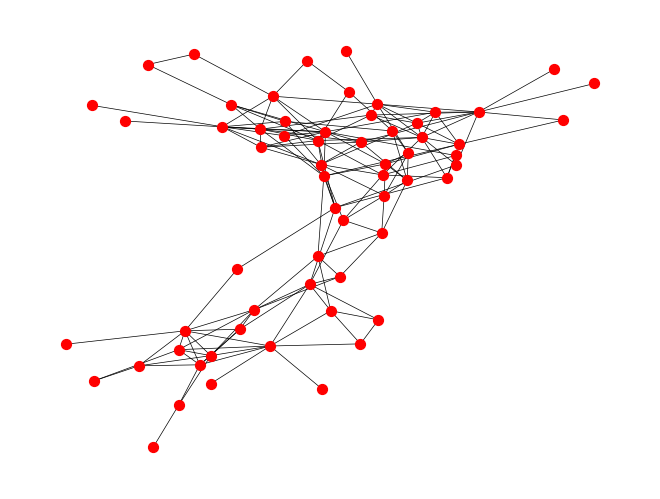

In [ ]:
"""
Please, pay attention to some of the configurations you can add to the draw function
"""

nx.draw(G2, node_size=50, node_color='red', width=0.5)

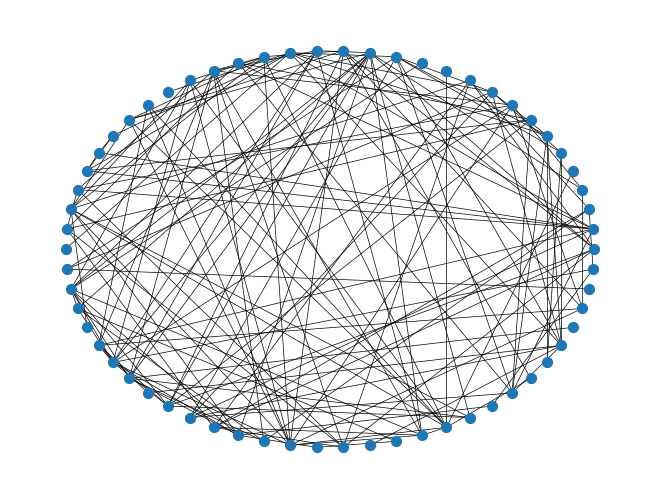

In [ ]:
"""
There are plenty of pre-defined layouts (circular layout is one of them)
See more here: https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout
"""

nx.draw_circular(G2, node_size=50, width=0.5)

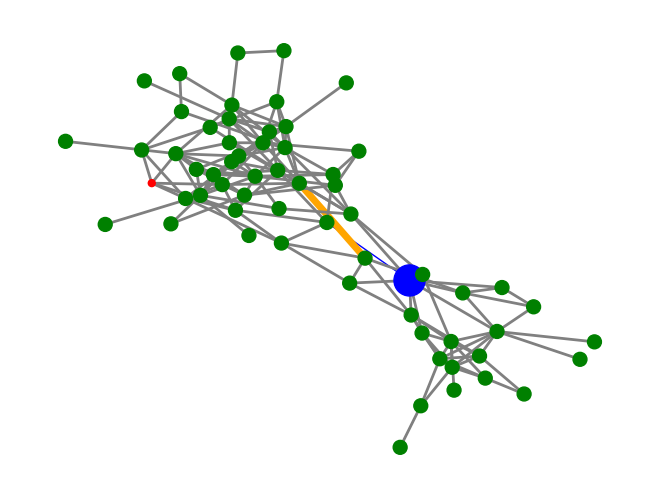

In [ ]:
"""
Note that you can also customize each node and edge as much as you desire
"""

colors = ['green'] * nx.number_of_nodes(G2)
colors[1] = 'blue'
colors[10] = 'red'

sizes = [100] * nx.number_of_nodes(G2)
sizes[1] = 500
sizes[10] = 25

width = [2] * nx.number_of_edges(G2)
width[10] = 1
width[35] = 5

edge_colors = ['gray'] * nx.number_of_edges(G2)
edge_colors[10] = 'blue'
edge_colors[35] = 'orange'

nx.draw(G2, node_color=colors, node_size=sizes,
        edge_color=edge_colors, width=width)

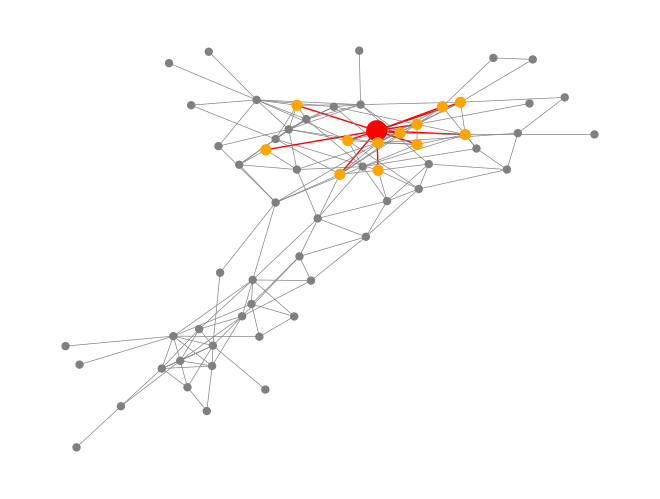

In [ ]:
"""
Let us draw a certain node and its neighbors
"""

node = 'Grin' # try 'Beak', 'Zap' or any others
neighbors = list(nx.neighbors(G2, n=node))

nodes_color = ['red' if node == n else 'orange' if n in neighbors else 'gray' for n in G2]
nodes_size = [200 if node == n else 50 if n in neighbors else 25 for n in G2]
edges_color = ['red' if node in edge else 'gray' for edge in G2.edges]
edges_width = [1 if node in edge else 0.5 for edge in G2.edges]

nx.draw(G2, node_color=nodes_color, node_size=nodes_size,
        edge_color=edges_color, width=edges_width)

At this point you have understood that you can customize your graph as much as you want. If you have any doubts on something specific that documentation can't help, you can always contact us, or google it or even use ChatGTP :)

Good luck!!